In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

C:\Users\M217\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('D:/R/car/car.csv', parse_dates=True)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug-boot    1728 non-null object
safety      1728 non-null object
income      1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
train.describe()

,buying,maint,doors,persons,lug-boot,safety,income
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,small,high,unacc
freq,432,432,432,576,576,576,1210


In [5]:
train = pd.DataFrame(train)

In [6]:
print(train.keys())

Index(['buying', 'maint', 'doors', 'persons', 'lug-boot', 'safety', 'income'], dtype='object')


In [7]:
X, Y = train.iloc[:,:-1],train.iloc[:,-1]

In [8]:
#資料分割
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25)

In [9]:
vec = DictVectorizer()
x_train = vec.fit_transform(x_train.to_dict(orient="record"))
x_test = vec.transform(x_test.to_dict(orient="record")) 

In [10]:
xgbc = XGBClassifier(booster = 'gbtree',
                     learning_rate =0.1,            #學習速率
                     n_estimators=100,              #擬合的提升樹數
                     max_depth=10,                  #樹的最大深度
                     min_child_weight=0.01,         #子項中所需的實例權重（粗體）的最小總和
                     gamma=0.3,                     #樹的葉節點上進行進一步分區所需的最小損耗減少量。
                     subsample=0.8,                 #訓練實例的子採樣率。
                     colsample_bytree=0.8,          #構造每個樹時列的子採樣率。
                     objective= 'binary:logistic',  #指定學習任務和相應的學習目標或要使用的自定義目標函數（請參閱下面的註釋）。
                     nthread=5,                     #用於運行xgboost的並行線程數。
                     scale_pos_weight=1,
                     reg_lambda= 2,
                     eval_metric = 'merror',        #評估Error方式
                     early_stopping_rounds = 10) 
xgbc.fit(x_train, y_train)
print("XGBoost預測準確率:", xgbc.score(x_test, y_test))  

XGBoost預測準確率: 0.9884259259259259


C:\Users\M217\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
import matplotlib.pyplot as plt
import os
import xgboost as xgb
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz/bin/'

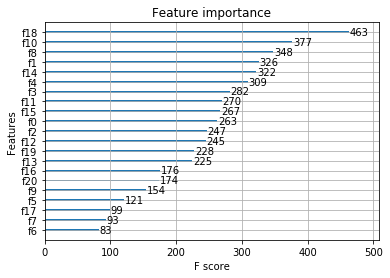

In [12]:
xgb.plot_importance(xgbc)
plt.rcParams['figure.figsize'] = [8.0,2.0]
plt.show()

In [13]:
#預測
ans = xgbc.predict(x_test)

C:\Users\M217\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [14]:
#混淆矩陣
pd.crosstab(y_test,ans,
           rownames=['y_test'],colnames=['ans'])

ans,acc,good,unacc,vgood
y_test,,,,
acc,91,2,0,1
good,0,17,0,0
unacc,1,1,301,0
vgood,0,0,0,18
